In [1]:
import os
import cv2
import numpy as np
from numpy import random
import matplotlib
from matplotlib import image
import matplotlib.pyplot as plt
import math

In [2]:
images = np.load('data_resized/images_rgb.npy')

In [3]:
file = np.load('pca_man_reduced.npy')
file.shape
file

array([[[ 1.13892514e+03, -2.08308136e+03,  3.23506705e+03],
        [ 7.69876527e+02, -1.07213014e+03,  1.27724589e+03],
        [-6.22113309e+02,  3.18935683e+02, -1.02000328e+02],
        ...,
        [ 9.17404453e+00,  1.83438972e+01,  4.22698598e+01],
        [ 1.47300766e+01, -3.96913877e+01, -4.28000466e+00],
        [-8.14537568e+00,  7.35941657e+01, -1.11720711e+02]],

       [[ 2.03186521e+03, -2.96502380e+03,  4.11129653e+03],
        [ 6.34447544e+02, -9.62611379e+02,  1.20612731e+03],
        [-6.29388894e+02,  3.58067537e+02, -2.19792498e+02],
        ...,
        [-4.74890450e+01, -6.35484993e+00,  6.23519760e+01],
        [-1.45321967e+02, -2.39436356e+01,  1.15964647e+02],
        [ 1.18190817e+01, -8.93602237e+01, -8.32712073e+00]],

       [[ 2.16709996e+03, -3.13209307e+03,  4.32562670e+03],
        [ 1.27326408e+02, -3.01322783e+02,  4.81195031e+02],
        [ 2.73285827e+02, -4.00895223e+02,  4.79411585e+02],
        ...,
        [ 3.38638138e-01,  5.18222054e+01,

In [4]:
file.shape

(8355, 150, 3)

In [5]:
file = file.reshape(8355, 450)
file.shape

(8355, 450)

In [6]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [0, 0, 1],
                             [0, 0, 0],
                             [1, 1, 0],
                             [1, 0, 1],
                             [0, 1, 1]])

    KColorMat = InitColorMat[0:K,:]

    colorVec = np.dot(Rnk, KColorMat)
    muColorVec = np.dot(np.eye(K), KColorMat)
    plt.scatter(X[:,0], X[:,1], c=colorVec)

    plt.scatter(Kmus[:,0], Kmus[:,1], s=200, c=muColorVec, marker='d', alpha = 0.7)
    plt.axis('equal')
    plt.show()

def calcSqDistances(X, Kmus):
    K = Kmus.shape[0]
    N, D = np.shape(X)
    sdist = np.zeros((N,K))
    
    for i in range(N):
        for j in range(K):
            sdist[i,j] = np.linalg.norm(X[i]-Kmus[j])**2
    return sdist   

def determineRnk(sqDmat):
    return np.eye(sqDmat.shape[1])[np.argmin(sqDmat,axis=1)]

def recalcMus(X, Rnk): 
    return (np.divide(np.dot(X.T, Rnk),np.sum(Rnk, axis=0))).T

def runKMeans(K, X):
    
    
  # For loop was meant to go across entire binary image set
  # With the current set-up, it took over an hour and a half
  # to run on this set before I interrupted it, so should most likely
  # test on one binary image
# The image data we run clustering on 
        #X = X.reshape((X.shape[1]*X.shape[0],3))
        #X = X.reshape((X.shape[1]*X.shape[0]),3)

    N = np.shape(X)[0]
    D = np.shape(X)[1]

    Kmus = np.zeros((K,D))

    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
        

    maxiters = 1000

    for iter in range(maxiters):
        #assign each data vector to closest mu vector as per Bishop (9.2)
        #do this by first calculating a squared distance matrix where the n,k entry
        #contains the squared distance from the nth data vector to the kth mu vector

        #sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus)

        #given the matrix of squared distances, determine the closest cluster
        #center for each data vector

        #R is the "responsibility" matrix
        #R will be an N-by-K matrix of binary values whose n,k entry is set as
        #per Bishop (9.2)
        #Specifically, the n,k entry is 1 if point n is closest to cluster k,
        #and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        #recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)


        #check to see if the cluster centers have converged.  If so, break.
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            print(iter)
            break
        return X, Kmus, Rnk
    #plotCurrent(X, Rnk, Kmus)




In [7]:
X, Kmus, Rnk = runKMeans(7, file)

In [8]:
X

array([[ 1.13892514e+03, -2.08308136e+03,  3.23506705e+03, ...,
        -8.14537568e+00,  7.35941657e+01, -1.11720711e+02],
       [ 2.03186521e+03, -2.96502380e+03,  4.11129653e+03, ...,
         1.18190817e+01, -8.93602237e+01, -8.32712073e+00],
       [ 2.16709996e+03, -3.13209307e+03,  4.32562670e+03, ...,
        -2.98523506e+01, -1.00950180e+02,  3.91238845e+01],
       ...,
       [ 5.24272764e+03, -4.44508379e+03,  3.59448896e+03, ...,
         3.16866356e+01,  6.86722767e+01,  5.91784668e+01],
       [ 3.85826746e+03, -4.66300313e+03,  3.37067573e+03, ...,
         1.85582778e+01,  2.24556606e+00,  2.15015599e+01],
       [ 3.91214341e+03, -1.90625378e+03,  2.85969790e+02, ...,
         4.96236270e+01, -3.58459929e+01,  4.31360419e+01]])

In [9]:
X.shape

(8355, 450)

In [10]:
len(X)

8355

In [11]:
Kmus

array([[-1.24567291e+03,  1.46051890e+03, -1.52171410e+03, ...,
        -1.60847006e+00, -2.90341802e-01, -4.74545518e-01],
       [-4.31052969e+03,  4.27154023e+03, -3.75690002e+03, ...,
         5.16755257e+00, -3.89017360e-01, -3.22209399e+00],
       [ 3.41563472e+03, -1.84550657e+03, -2.13110453e+02, ...,
         1.89171740e-01,  4.20858761e-01,  6.85131599e+00],
       ...,
       [ 1.30419767e+03, -1.95073660e+03,  2.30384509e+03, ...,
         1.69410055e+00, -1.43354976e+00,  2.76153913e+00],
       [ 4.61820944e+03, -4.96452748e+03,  5.11387863e+03, ...,
        -2.53638603e-01, -4.10144743e-01, -1.84226663e+00],
       [-4.47557806e+02,  6.95407341e+02, -4.98986871e+02, ...,
         1.17688607e+01, -1.89483469e+01,  6.66738267e+00]])

In [12]:
Rnk

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [13]:
Rnk.shape

(8355, 7)

In [14]:
labels = Rnk.T
labels.shape

(7, 8355)

In [15]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
len(labels)

7

In [17]:
N, D = labels.shape
N

7

In [18]:
check = []
check.append([9,0,8])
print(check)

[[9, 0, 8]]


In [19]:
check

[[9, 0, 8]]

In [20]:
#takes the rnk array 
#when rank value is 1 (value is in the cluster)
#with the help of that information, created a function that 
#checks if value in rank matrix is 1, 
#if so the index value of that 1 which corresponds to index value of image in images file is appended
#returns a list of arrays with indexes of images that belong to the same cluster 
#arrays correspond to cluster
def grouping(labels):
    groups = []
    N, D = labels.shape
    for i in labels: 
        g = np.where(i==1)
        groups.append(g)
    
    return groups     

In [21]:
label = grouping(labels)

In [22]:
print(len(label))

7


In [23]:
label

[(array([  17,   21,   43, ..., 8339, 8345, 8346]),),
 (array([ 597,  609,  612,  614,  616,  635,  638,  646,  654,  655,  660,
          693,  696,  710,  721,  726,  730,  739,  742,  758,  776,  784,
          900,  916,  922,  930,  957,  999, 1001, 1051, 1154, 1156, 1157,
         1158, 1160, 1165, 1167, 1176, 1186, 1191, 1193, 1194, 1196, 1199,
         1203, 1307, 1348, 1355, 1358, 1367, 1370, 1371, 1373, 1374, 1381,
         1383, 1385, 1468, 1493, 1497, 1523, 1548, 1550, 1558, 1589, 1600,
         1638, 1645, 1650, 1652, 1654, 1662, 1706, 1736, 1737, 2094, 2096,
         2101, 2106, 2108, 2114, 2115, 2116, 2119, 2121, 2127, 2128, 2135,
         2139, 2141, 2146, 2148, 2175, 2178, 2196, 2207, 2218, 2245, 2256,
         2260, 2264, 2265, 2270, 2276, 2280, 2281, 2284, 2288, 2292, 2293,
         2295, 2296, 2303, 2308, 2310, 2314, 2315, 2317, 2321, 2323, 2324,
         2325, 2327, 2331, 2334, 2335, 2338, 2347, 2349, 2353, 2356, 2358,
         2366, 2367, 2376, 2403, 2410, 2413, 2

In [24]:
label[0][0][1]

21

In [25]:
np.save("seven", label)

/Users/meghachouthai/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [26]:
import pandas as pd

In [27]:
check = [5]*5
check

[5, 5, 5, 5, 5]

In [28]:

#def dframe(file, label):
    #df = pd.DataFrame(columns = ['Indices', 'Image Array', 'Label'])
    #for i in range(len(label)):
        #ind = label[i][0].tolist()
        #l = [i]*len(ind)
        #for j in ind:
            #df = df.append({'Indices': j}, ignore_index=True)
            #df = df.append({'Image Array': file[j]}, ignore_index=True)
            #for g in l:
                #df = df.append({'Label': g}, ignore_index=True)
                
    #return df           

In [ ]:
'''

def reformImage(pca_channels, idx):
    img_reduced = np.zeros((N, l, l, 3), dtype="uint8")
    z_r = [0.0, 0.0, 0.0]
    x = 0
    for c in pca_channels:
        z_r[x] = c[1] @ c[0] + c[3].T
        z_r[x] = np.uint8(np.clip(z_r[x], 0, 255))
        x += 1
    img_reduced = np.dstack((z_r[0], z_r[1], z_r[2]))
    img_reduced = np.reshape(img_reduced, (N, l, l, 3))[idx]
    return img_reduced
'''

In [44]:
#plots the images that belong to the same cluster when given a cluster number 
#index starts at 0
def getImage(images, label, Kno):
    lst = label[Kno][0].tolist()
    for i in lst:
        f = plt.figure()
        plt.imshow(images[i])
        plt.show()
        

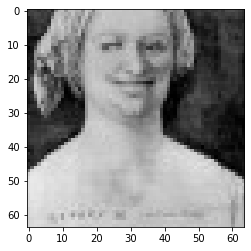

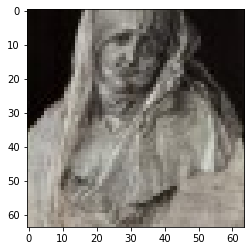

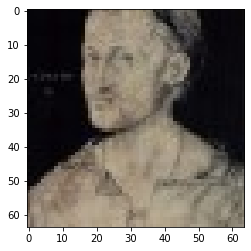

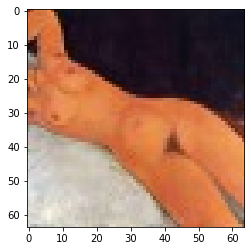

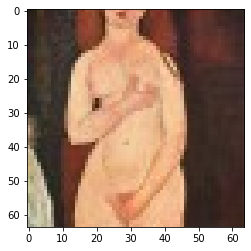

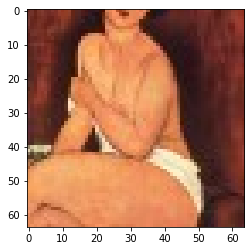

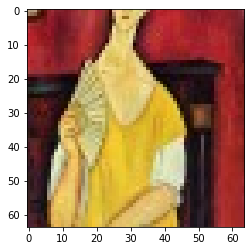

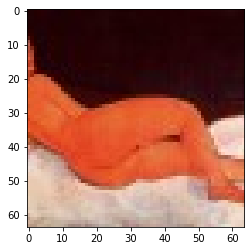

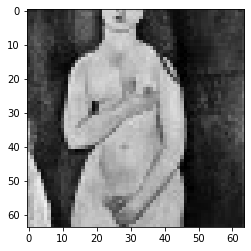

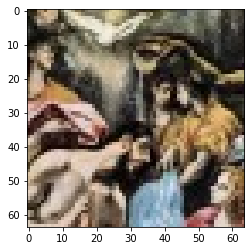

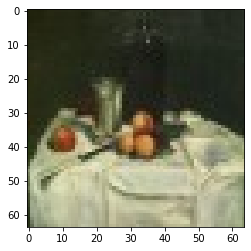

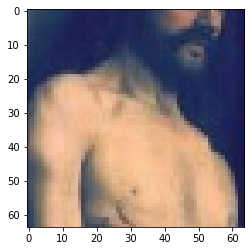

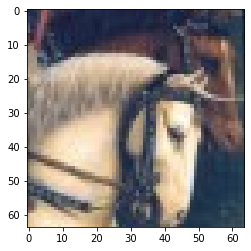

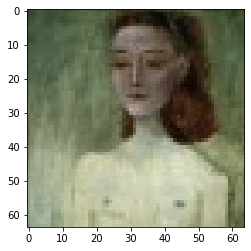

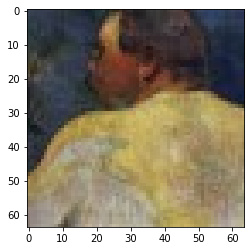

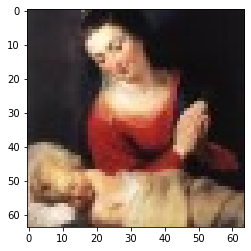

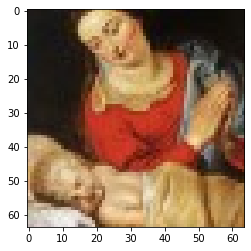

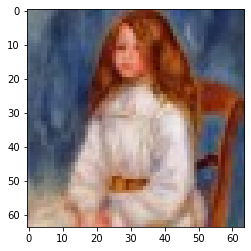

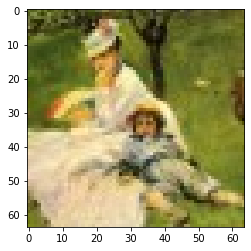

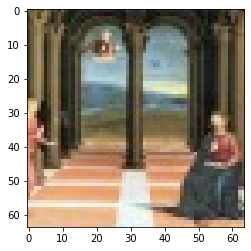

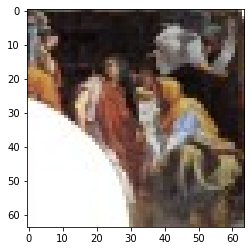

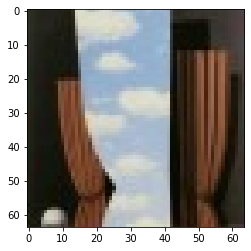

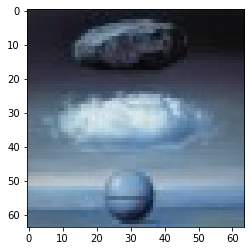

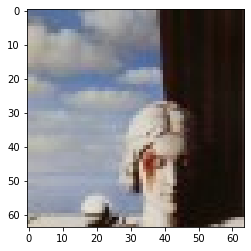

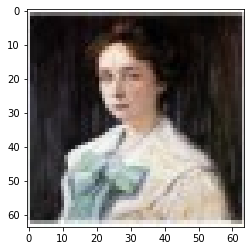

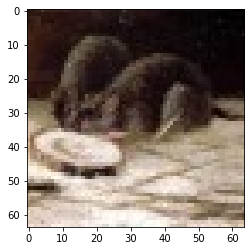

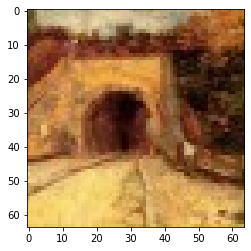

In [45]:
getImage(images, label, 6)